![logo](../Data/JFM-notebooks-logo.jpg)

In [3]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
plt.rcParams.update({'font.size': 18})
plt.rc('text', usetex=True)
plt.rc('text.latex',preamble=r"\usepackage{amsmath}")
plt.rc('font', family='serif')

In [4]:
# Loading datasets
ds_lp = xr.open_dataset('../Data/solver_lowpass_x_y_omega_2_Nint_1_strat_3_T_40.nc')
ds_th = xr.open_dataset('../Data/solver_tophat_x_y_Nint_1_strat_3_T_40.nc')

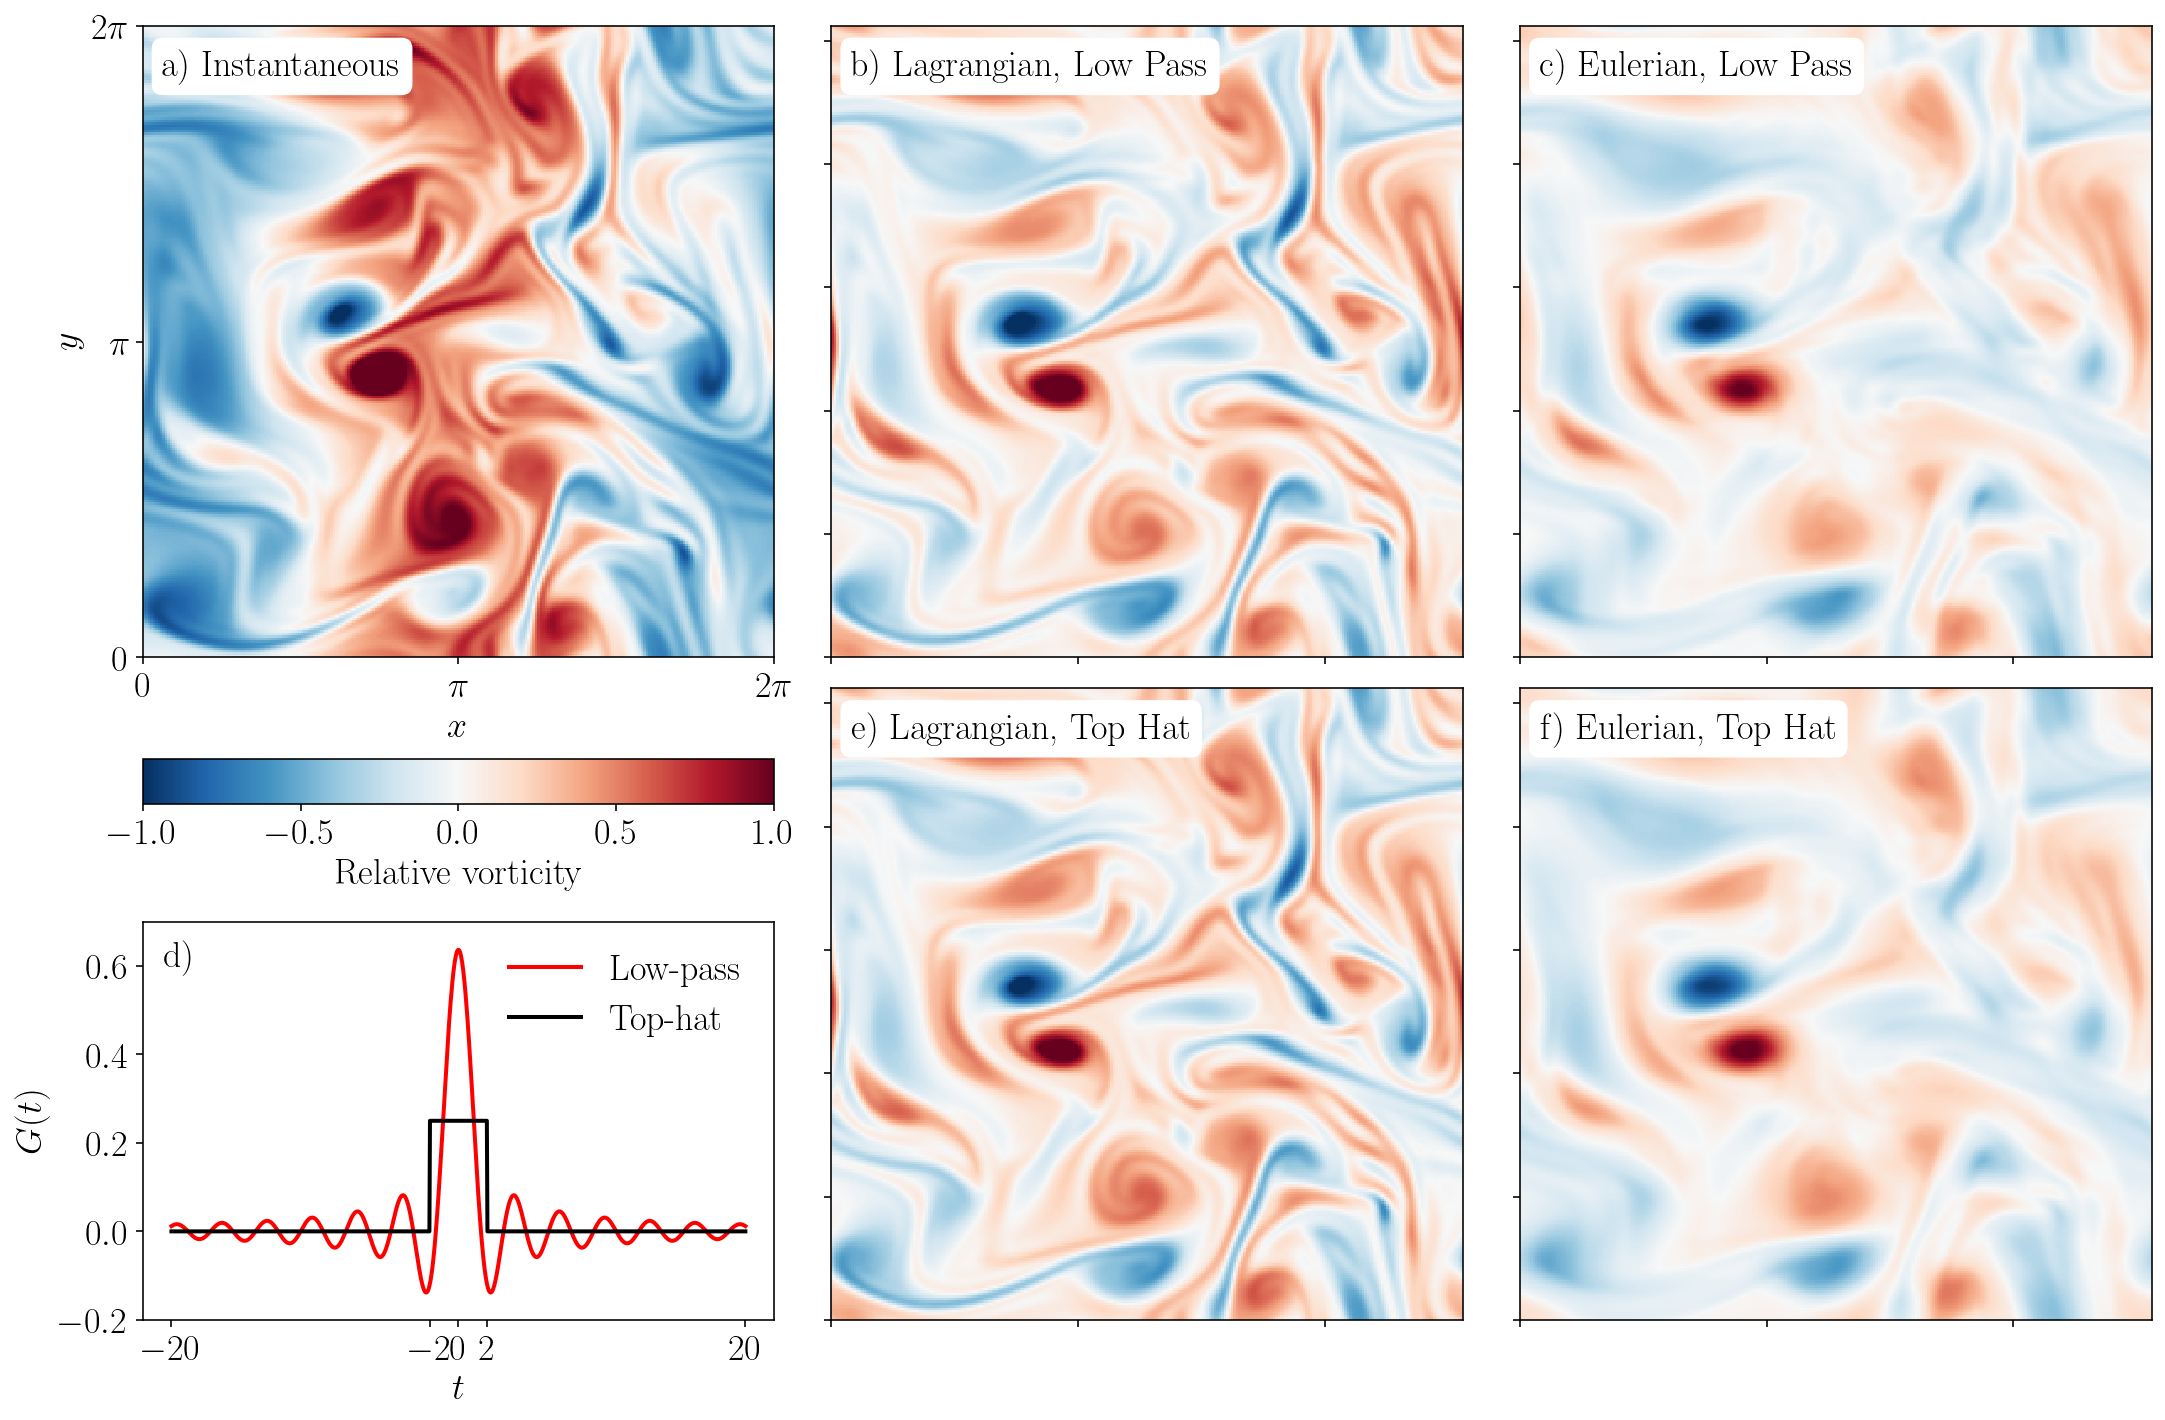

In [5]:
# Initialising figure
fig = plt.figure(figsize = (18,11.9))
ax0 = plt.subplot2grid((48, 12), (0, 0), colspan=4,rowspan=24)
ax1 = plt.subplot2grid((48, 12), (0, 4), colspan=4,rowspan=24)
ax2 = plt.subplot2grid((48, 12), (0, 8), colspan=4,rowspan=24)
ax3 = plt.subplot2grid((48, 12), (24, 4), colspan=4,rowspan=24)
ax4 = plt.subplot2grid((48, 12), (24, 8), colspan=4,rowspan=24)
ax5 = plt.subplot2grid((48, 12), (33, 0), colspan=4,rowspan=15)
axcb = plt.subplot2grid((48, 12), (27, 0), colspan=4,rowspan=2)
axes = [ax0,ax1,ax2,ax3,ax4]

# Plotting
vmin = -1
vmax = 1

p0 = ax0.pcolormesh(ds_lp.z_inst,vmin = vmin, vmax = vmax,cmap = 'RdBu_r')
ax1.pcolormesh(ds_lp.z_LM_at_mean,vmin = vmin, vmax = vmax,cmap = 'RdBu_r')
ax2.pcolormesh(ds_lp.z_EM,vmin = vmin, vmax = vmax,cmap = 'RdBu_r')
ax3.pcolormesh(ds_th.z_LM_at_mean,vmin = vmin, vmax = vmax,cmap = 'RdBu_r')
ax4.pcolormesh(ds_th.z_EM,vmin = vmin, vmax = vmax,cmap = 'RdBu_r')
fig.colorbar(p0,cax=axcb,orientation='horizontal',label='Relative vorticity',shrink=0.5)

textposx = 8
textposy = 236
bbox=dict(facecolor='white', edgecolor='none', boxstyle='round')
ax0.text(textposx,textposy,'a) Instantaneous',bbox=bbox)
ax1.text(textposx,textposy,'b) Lagrangian, Low Pass',bbox=bbox)
ax2.text(textposx,textposy,'c) Eulerian, Low Pass',bbox=bbox)
ax3.text(textposx,textposy,'e) Lagrangian, Top Hat',bbox=bbox)
ax4.text(textposx,textposy,'f) Eulerian, Top Hat',bbox=bbox)

# Plot weight function panel
t = np.linspace(-20,20,1000)
g_th = np.zeros_like(t)
omega_crit=2
T = 40
g_th[(t < 2) & (t> -2)] = 1/4
g_lp = (np.sin(t*omega_crit)/np.pi/t)
g_lp[(t > T/2) | (t< -T/2)] = 0
ax5.plot(t,g_lp,'r',linewidth=2,label='Low-pass')
ax5.plot(t,g_th,'k',linewidth=2,label='Top-hat')
ax5.legend(loc='upper right',frameon=False)
ax5.text(-20.5,0.6,'d)',bbox=bbox)

# Formatting
[ax.axes.set_xticklabels([]) for ax in axes];
[ax.axes.set_yticklabels([]) for ax in axes];
ax0.set_xticks([0,128,256])
ax0.set_yticks([0,128,256])
labels = ['0','$\pi$','$2\pi$']
ax0.set_xticklabels(labels)
ax0.set_yticklabels(labels)
ax0.set_xlabel('$x$')
ax0.set_ylabel('$y$')

ax5.set_ylim([-0.2,0.7])
ax5.set_xlabel(r'$t$')
ax5.set_ylabel(r'$G(t)$')
ax5.set_xticks([-20,-2,0,2,20])

ax0.set_aspect('equal',anchor='NW')
ax1.set_aspect('equal',anchor='NW')
ax2.set_aspect('equal',anchor='NE')
ax3.set_aspect('equal',anchor='SW')
ax4.set_aspect('equal',anchor='SE')

plt.subplots_adjust(hspace=0.5,wspace=0.5)

# Save figure
fig.savefig('Figure-2.png',dpi=200,bbox_inches='tight')

Shallow water relative vorticity for a simulation over 40 time units ($T=20$). The mode-1 wave frequency is $\omega = 4.17$, and the low-pass filters use a cut-off frequency of $\omega_c = 2$. a) Instantaneous vorticity at the interval midpoint $t^* = 20$. b) Lagrangian and c) Eulerian low-pass at $t^* = 20$. e) Lagrangian and f) Eulerian top-hat mean at $t^* = 20$, computed over the interval $[-18,22]$, i.e. $T = 2$. d) $G(t)$ for the low-pass and top-hat means, showing that $T = 2$ is an appropriate averaging interval for the top-hat to compare it to the low-pass.

More data variables are available in the xarray datasets:

In [5]:
ds_lp

<xarray.Dataset>
Dimensions:         (y: 256, x: 256)
Coordinates:
  * x               (x) float64 0.0 0.02454 0.04909 0.07363 ... 6.21 6.234 6.259
  * y               (y) float64 0.0 0.02454 0.04909 0.07363 ... 6.21 6.234 6.259
    t               float64 10.0
Data variables:
    z_inst          (y, x) float64 0.3789 0.4081 0.4293 ... 0.363 0.3378 0.3367
    z_EM            (y, x) float64 0.1332 0.1269 0.1269 ... 0.1836 0.1673 0.15
    z_inst_at_end   (y, x) float64 0.376 0.3701 0.3587 ... 0.3636 0.3812 0.388
    z_LM_at_mid     (y, x) float64 0.225 0.2586 0.2846 ... 0.1832 0.1719 0.1773
    z_LM_at_end     (y, x) float64 0.4292 0.4323 0.4302 ... 0.349 0.3851 0.4026
    Xi31_x          (y, x) float64 0.3053 0.3163 0.3215 ... 6.564 6.587 6.61
    Xi31_y          (y, x) float64 -0.4003 -0.3907 -0.3792 ... 5.838 5.845 5.851
    z_inst_at_mean  (y, x) float64 0.5157 0.4681 0.4167 ... 0.4627 0.5074 0.5283
    z_LM_at_mean    (y, x) float64 0.2706 0.2499 0.2295 ... 0.2044 0.2463 0.2662
    Xi32_x          (y, x) float64 0.1869 0.2136 0.2401 ... 6.389 6.416 6.443
    Xi32_y          (y, x) float64 -0.06739 -0.06466 -0.0619 ... 6.186 6.189
    timestep        int32 2000
Attributes:
    description:  SW GLM solver outputs